In [1]:
#Dependencies 
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
#Reading in file
olympic_file = "olympics-challenge/olympics.csv"
olympic_df = pd.read_csv(olympic_file)
olympic_df.head()

,Unnamed: 0,City,Olympics Year,Sport,Discipline,Event,Athlete,Gender,Country,Event_gender,Medal,combo,host country,GDP Year,GDP (constant 2010 US$)
0,0,Athens,2004,Aquatics,Diving,3m springboard,"DESPATIE, Alexandre",Men,Canada,M,Silver,Canada2004,Greece,2004.0,1.480000e+12
1,1,Athens,2004,Aquatics,Diving,3m springboard,"SAUTIN, Dmitry",Men,Russia,M,Bronze,Russia2004,Greece,2004.0,1.200000e+12
2,2,Athens,2004,Aquatics,Diving,3m springboard,"PAKHALINA, Ioulia",Women,Russia,W,Bronze,Russia2004,Greece,2004.0,1.200000e+12
3,3,Athens,2004,Aquatics,Diving,synchronized diving 3m springboard,"NEWBERY, Robert",Men,Australia,M,Bronze,Australia2004,Greece,2004.0,9.640000e+11
4,4,Athens,2004,Aquatics,Diving,synchronized diving 3m springboard,"BIMIS, Thomas",Men,Greece,M,Gold,Greece2004,Greece,2004.0,3.030000e+11


In [3]:
#Grouping by Country and GDP Year to find medal count 
country_year_df = olympic_df.groupby(["Country", "GDP Year"]).count()
#country_year_df.head()

#Creating new Dataframe 
medal_df = country_year_df[["Medal"]]
medal_df

Medal
Country     GDP Year       
Afghanistan 2008.0        1
Algeria     1984.0        2
            1992.0        2
            1996.0        3
            2000.0        5
...                     ...
Zambia      1984.0        1
            1996.0        1
Zimbabwe    1980.0       16
            2004.0        3
            2008.0        4

[482 rows x 1 columns]

In [4]:
#Grouping by Country and GDP Year to find GDP for each country for each Olympic Year
country_year_df2 = olympic_df.groupby(["Country", "GDP Year"]).max()

#Creating new Dataframe with just GDP 
gdp_df = country_year_df2[["GDP (constant 2010 US$)"]]
gdp_df

GDP (constant 2010 US$)
Country     GDP Year                         
Afghanistan 2008.0               1.214448e+10
Algeria     1984.0               8.540465e+10
            1992.0               9.252182e+10
            1996.0               9.699483e+10
            2000.0               1.100000e+11
...                                       ...
Zambia      1984.0               7.624642e+09
            1996.0               8.788653e+09
Zimbabwe    1980.0               8.418871e+09
            2004.0               1.113774e+10
            2008.0               8.041897e+09

[482 rows x 1 columns]

In [5]:
#Merging two dataframes together
merge_df = pd.merge(medal_df, gdp_df, on =["Country", "GDP Year"])
merge_df

Medal  GDP (constant 2010 US$)
Country     GDP Year                                
Afghanistan 2008.0        1             1.214448e+10
Algeria     1984.0        2             8.540465e+10
            1992.0        2             9.252182e+10
            1996.0        3             9.699483e+10
            2000.0        5             1.100000e+11
...                     ...                      ...
Zambia      1984.0        1             7.624642e+09
            1996.0        1             8.788653e+09
Zimbabwe    1980.0       16             8.418871e+09
            2004.0        3             1.113774e+10
            2008.0        4             8.041897e+09

[482 rows x 2 columns]

The r-squared is: 0.6100488026673956


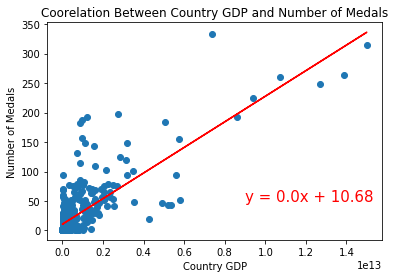

In [6]:
#x and y values for our scatter plot
x_values = merge_df["GDP (constant 2010 US$)"]
y_values = merge_df["Medal"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#Finding values
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plotting our data and line
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(9000000000000,50),fontsize=15,color="red")
plt.xlabel("Country GDP")
plt.ylabel("Number of Medals")
plt.title("Coorelation Between Country GDP and Number of Medals")

print(f"The r-squared is: {rvalue**2}")